# Unsupervised Learning

## Categorising Countries on Basis of Socio-economic Factors

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Gathering the data

In [3]:
data = pd.read_csv('Country-data.csv')
df = data.copy()

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [6]:
print('Dataframe size: ',df.size)
print("Dataframe shape: ",df.shape)

Dataframe size:  1670
Dataframe shape:  (167, 10)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
df.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

* There are no null values in the data.

In [10]:
df.duplicated().sum()

0

* There are now duplicate rows.

### EDA

In [11]:
cols = list(df.columns)
cols

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [12]:
numeric = cols[1:]
objective = df.country

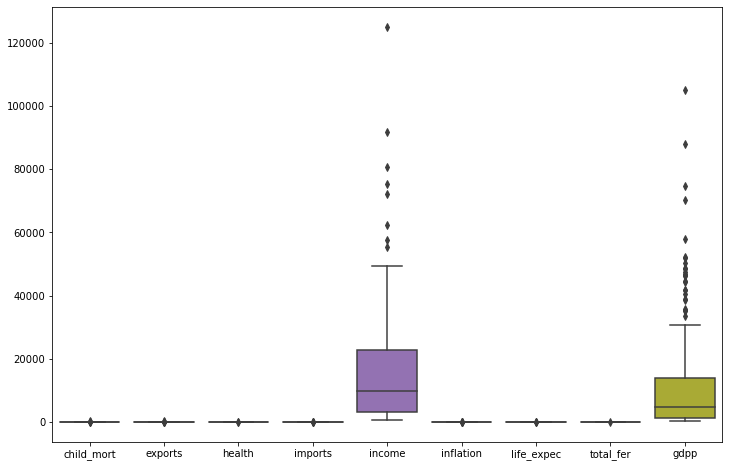

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df);

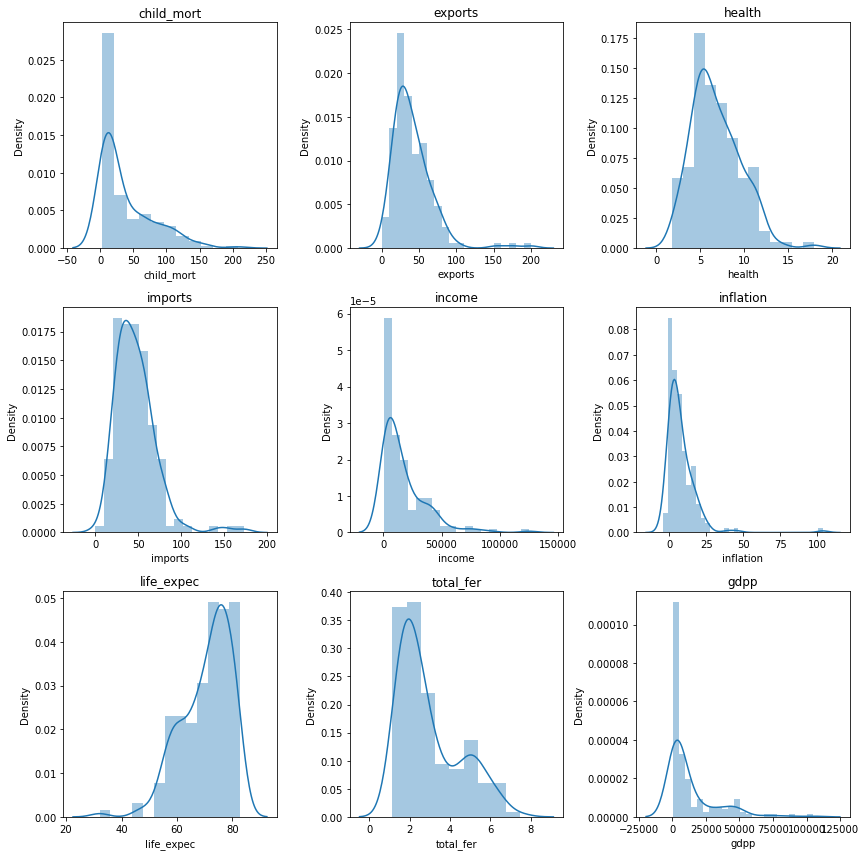

In [14]:
fig , ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
for i  in range(len(numeric)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[numeric[i]])
    title = numeric[i]
    plt.title(title)
plt.tight_layout()

* Life expectancy distribution is negatively skewed.
* Health expenditure has an approximate normal distribution.
* All distributions except Life Expectancy show close to positive skewness.

#### GDP

Text(0.5, 0.98, 'GDP per capita vs country')

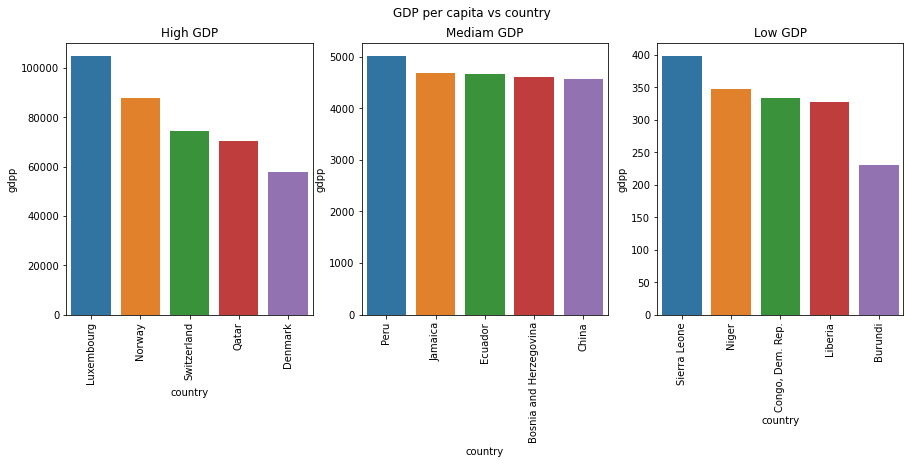

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x = 'country', y= 'gdpp', data = df.sort_values(by='gdpp',ascending=False).iloc[:5],ax=ax[0])
sns.barplot(x = 'country', y= 'gdpp', data = df.sort_values(by='gdpp',ascending=False).iloc[81:86],ax=ax[1])
sns.barplot(x = 'country', y= 'gdpp', data = df.sort_values(by='gdpp',ascending=False).iloc[-5:],ax=ax[2])
c = ['High','Mediam','Low']
for i in range(3):
    title = c[i] + ' ' + 'GDP'
    ax[i].set_title(title)
    ax[i].tick_params(axis='x', labelrotation = 90)
fig.suptitle('GDP per capita vs country')

* GDP per capita is a measure of the standard of living, prosperity and overall well-being in a country. Low GDP per capita means that the country is unable to supply the country's population with basic goods and services.
* GDP growth also depends on the population of the country.
* African countries lie at the bottom end for GDP per capita. This gives an idea of poor economic conditions with a weak GDP.

####  INCOME

Text(0.5, 0.98, 'INCOME per capita vs country')

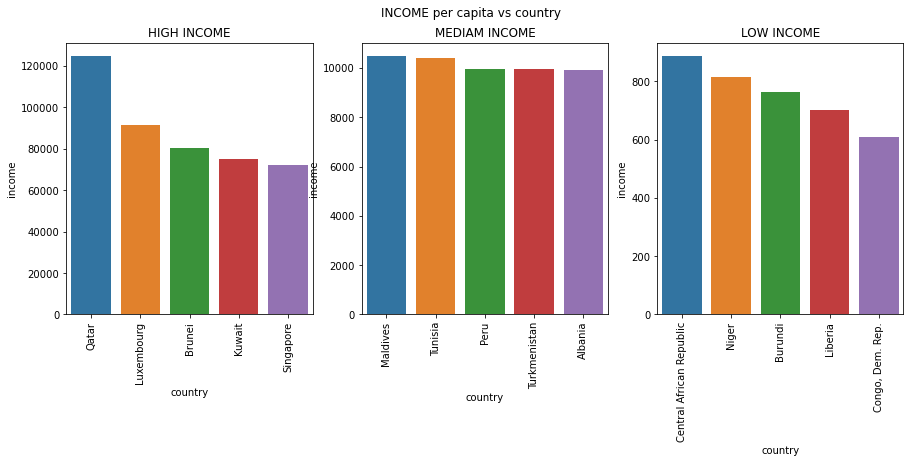

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x = 'country', y= 'income', data = df.sort_values(by='income',ascending=False).iloc[:5],ax=ax[0])
sns.barplot(x = 'country', y= 'income', data = df.sort_values(by='income',ascending=False).iloc[81:86],ax=ax[1])
sns.barplot(x = 'country', y= 'income', data = df.sort_values(by='income',ascending=False).iloc[-5:],ax=ax[2])
c = ['HIGH','MEDIAM','LOW']
for i in range(3):
    title = c[i] + ' ' + 'INCOME'
    ax[i].set_title(title)
    ax[i].tick_params(axis='x', labelrotation = 90)
fig.suptitle('INCOME per capita vs country')

* Majority of the countries in the bottom 5 are from Africa. The reasons for this could be due to poor employment conditions and their weaker economies. Moreover, African nations lie in the bottom list for GDP per capita.
* In the High, Medium and Low categories, the range of the values show large variations.

#### Health

Text(0.5, 0.98, 'health per capita vs country')

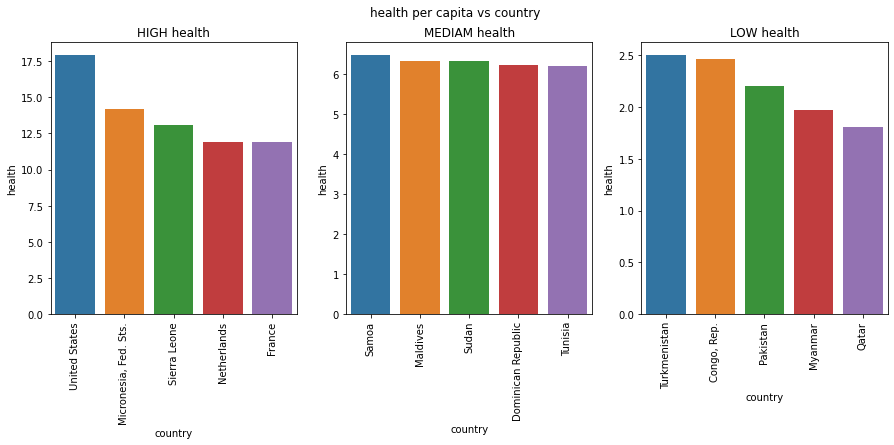

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x = 'country', y= 'health', data = df.sort_values(by='health',ascending=False).iloc[:5],ax=ax[0])
sns.barplot(x = 'country', y= 'health', data = df.sort_values(by='health',ascending=False).iloc[81:86],ax=ax[1])
sns.barplot(x = 'country', y= 'health', data = df.sort_values(by='health',ascending=False).iloc[-5:],ax=ax[2])
c = ['HIGH','MEDIAM','LOW']
for i in range(3):
    title = c[i] + ' ' + 'health'
    ax[i].set_title(title)
    ax[i].tick_params(axis='x', labelrotation = 90)
fig.suptitle('health per capita vs country')

* Proper healthcare system and services, leads to a healthy human capital and hence higher income per person.
* Qatar is at the bottom for spending in healthcare. On the other hand, it is the leading country in net income earned per person.
* United States is the leading country with regards to spending in healthcare, which is around 18% of its GDP.

Text(0.5, 0.98, 'Life Expectancy per capita vs country')

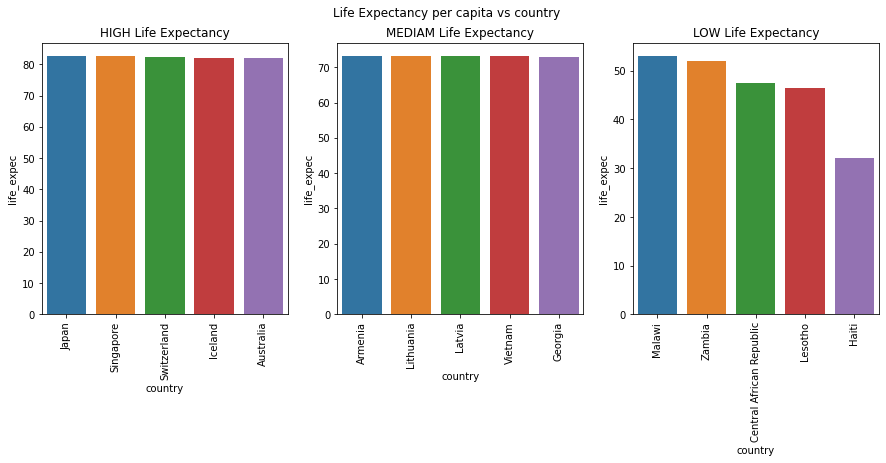

In [18]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x = 'country', y= 'life_expec', data = df.sort_values(by='life_expec',ascending=False).iloc[:5],ax=ax[0])
sns.barplot(x = 'country', y= 'life_expec', data = df.sort_values(by='life_expec',ascending=False).iloc[81:86],ax=ax[1])
sns.barplot(x = 'country', y= 'life_expec', data = df.sort_values(by='life_expec',ascending=False).iloc[-5:],ax=ax[2])
c = ['HIGH','MEDIAM','LOW']
for i in range(3):
    title = c[i] + ' ' + 'Life Expectancy'
    ax[i].set_title(title)
    ax[i].tick_params(axis='x', labelrotation = 90)
fig.suptitle('Life Expectancy per capita vs country')

* Higher life expectancy has causation with greater standards of living and proper healthcare infrastructure in the country.
* In the bottom 5 countries, all of them are in Africa, with Haiti being an exception.
* Haiti has a life expectancy as low as 30yrs.

### Correlation matrix for the features

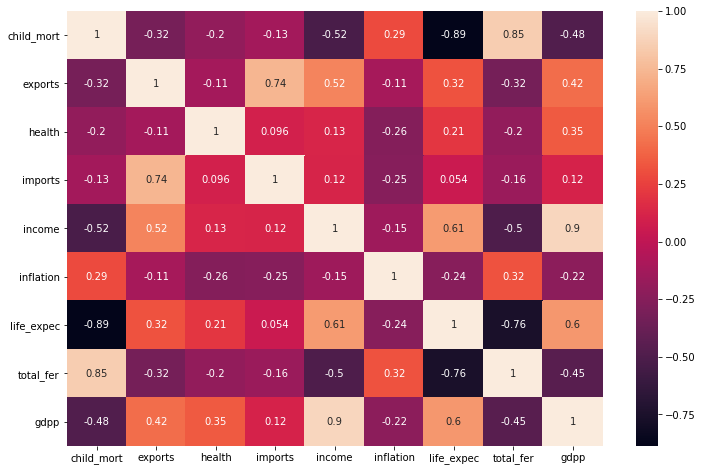

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

* Fertility rate and child mortality show 85% of positive correlation, which agrees with the theory. In addition, Life Expectancy has a strong negative correlation with child mortality.
* Imports and Exports have a 74% positive correlation in this data.

In [20]:
x=df.drop(['country'],axis=1).values

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale = StandardScaler()
scaled = scale.fit_transform(x)

In [23]:
from sklearn.cluster import KMeans

Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(x)
    Wcss.append(kmeans.inertia_)
print(Wcss)

[117459687469.07817, 36528387934.3221, 21710210039.75414, 14610713446.535133, 10665874358.647743, 7655725089.094504, 5353767457.732321, 4260514816.1154003, 3249350807.2762313, 2709452471.10911]


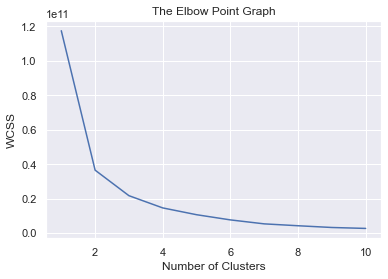

In [24]:
sns.set()
plt.plot(range(1,11),Wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

* The drastic change at some point shows the best number of clusters. That's why curve at the 3 clusters shows the elbow like shape so Optimal no fo clusters are 3

### Training The Model

In [25]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=9)
y=kmeans.fit_predict(x)
y

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [26]:
data['Cluster']=y

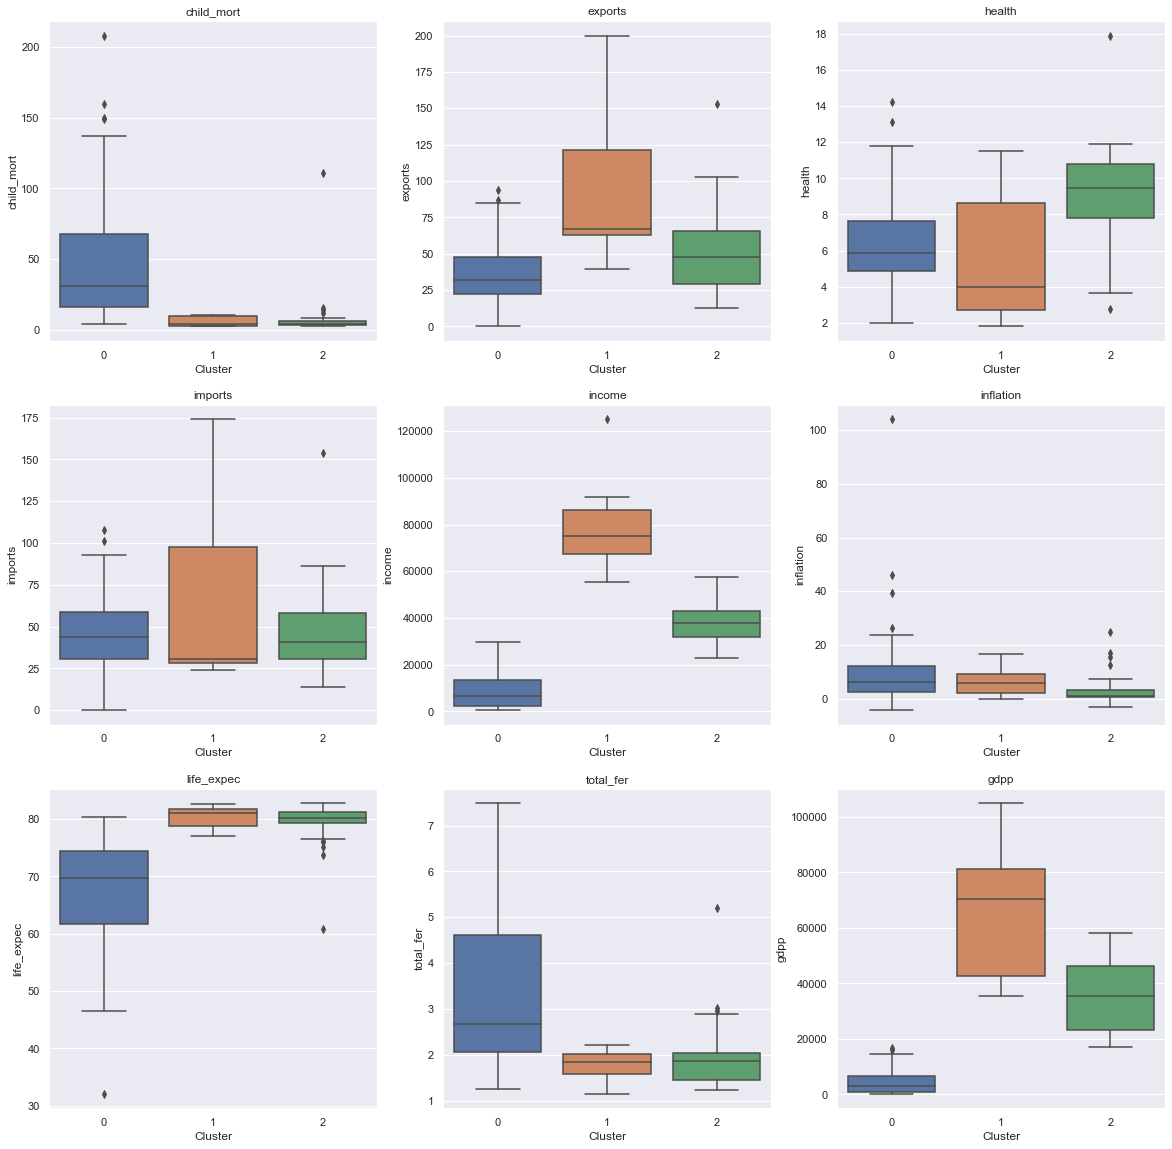

In [27]:
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data.Cluster,data[l[i]])
    plt.title(l[i])

## Result

* Graph between Cluster and child_mort is showing that there are greater number of deaths (ranging from 20 to 70) below 5 year child in cluster no 0 ( may be due to health issue ). which are more as compared to cluster 1 and 2 .
* Graph between Cluster and exports showing that their are less no of exports in cluster 0 ranging from 24 to 50 which are less as compared to cluster 1 and 2.
* Graph between Cluster and health is showing that there are less spending on health in Cluster 0 as compared to cluster 1 and 2.
* Graph between Cluster and income is showing that there is less income range in Cluster 0 as compared to 1 and 2.

* There is more inflation in cluster 0.

* life_expec range is less in cluster 0.
* Graph between Cluster and total_fer showing that population is increasing rapidly in cluster 0
* GDPP is less in Cluster 0.

#### All these results are showing that the HELP NGO should more focus on contries which are in cluster 0